In [2]:
import numpy as np
np.random.seed(1001)
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures

In [3]:
df = pd.read_csv("MeteoriteData.csv", sep=';', encoding = "ISO-8859-1")
df

,Name,ID,NameType,Classification,Mass,Fall,Year,Coordinates
0,Aachen,1,Valid,L5,"Quantity[21, ""Grams""]",Fell,1880.0,"GeoPosition[{50.775, 6.08333}]"
1,Aarhus,2,Valid,H6,"Quantity[720, ""Grams""]",Fell,1951.0,"GeoPosition[{56.18333, 10.23333}]"
2,Abee,6,Valid,EH4,"Quantity[107000, ""Grams""]",Fell,1952.0,"GeoPosition[{54.21667, -113.}]"
3,Acapulco,10,Valid,Acapulcoite,"Quantity[1914, ""Grams""]",Fell,1976.0,"GeoPosition[{16.88333, -99.9}]"
4,Achiras,370,Valid,L6,"Quantity[780, ""Grams""]",Fell,1902.0,"GeoPosition[{-33.16667, -64.95}]"
...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,"Quantity[172, ""Grams""]",Found,1990.0,"GeoPosition[{29.037, 17.0185}]"
45712,Zinder,30409,Valid,"Pallasite, ungrouped","Quantity[46, ""Grams""]",Found,1999.0,"GeoPosition[{13.78333, 8.96667}]"
45713,Zlin,30410,Valid,H4,"Quantity[3.3, ""Grams""]",Found,1939.0,"GeoPosition[{49.25, 17.66667}]"
45714,Zubkovsky,31357,Valid,L6,"Quantity[2167, ""Grams""]",Found,2003.0,"GeoPosition[{49.78917, 41.5046}]"


In [4]:
#Nettoie les valeurs de la masse et on indique si la masse est inconnue ou non
df['Mass']=df['Mass'].astype(str)
count=0
for i in df['Mass']:
    df['Mass'][count] = ''.join(filter(lambda i: i.isdigit() or i=='.', df['Mass'][count]))
    try:
        df['Mass'][count]=float(df['Mass'][count])
    except:
        df['Mass'][count]= -99 #-99 means value is unknown
    count+=1
df
    

C:\Users\tlejo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\tlejo\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\tlejo\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Name,ID,NameType,Classification,Mass,Fall,Year,Coordinates
0,Aachen,1,Valid,L5,21,Fell,1880.0,"GeoPosition[{50.775, 6.08333}]"
1,Aarhus,2,Valid,H6,720,Fell,1951.0,"GeoPosition[{56.18333, 10.23333}]"
2,Abee,6,Valid,EH4,107000,Fell,1952.0,"GeoPosition[{54.21667, -113.}]"
3,Acapulco,10,Valid,Acapulcoite,1914,Fell,1976.0,"GeoPosition[{16.88333, -99.9}]"
4,Achiras,370,Valid,L6,780,Fell,1902.0,"GeoPosition[{-33.16667, -64.95}]"
...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172,Found,1990.0,"GeoPosition[{29.037, 17.0185}]"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46,Found,1999.0,"GeoPosition[{13.78333, 8.96667}]"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,"GeoPosition[{49.25, 17.66667}]"
45714,Zubkovsky,31357,Valid,L6,2167,Found,2003.0,"GeoPosition[{49.78917, 41.5046}]"


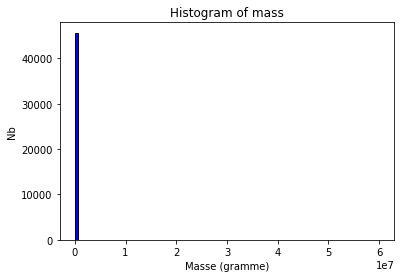

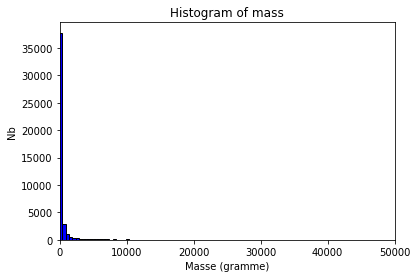

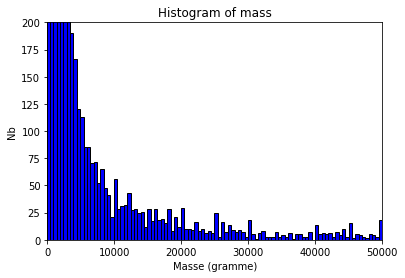

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
plt.hist(df['Mass'], color = 'blue', edgecolor = 'black',
        bins = 100)

# Add labels
plt.title('Histogram of mass')
plt.xlabel('Masse (gramme)')
#plt.xlim([0,50000])
#plt.ylim([0,5000])
plt.ylabel('Nb')
plt.show()

# matplotlib histogram
plt.hist(df['Mass'][df['Mass']<=50000], color = 'blue', edgecolor = 'black',
        bins = 100)
# Add labels
plt.title('Histogram of mass')
plt.xlabel('Masse (gramme)')
plt.xlim([0,50000])
#plt.ylim([0,5000])
plt.ylabel('Nb')
plt.show()


plt.hist(df['Mass'][df['Mass']<=50000], color = 'blue', edgecolor = 'black',
        bins = 100)
# Add labels
plt.title('Histogram of mass')
plt.xlabel('Masse (gramme)')
plt.xlim([0,50000])
plt.ylim([0,200])
plt.ylabel('Nb')
plt.show()

y = 26.69571 * x + -52175.94986


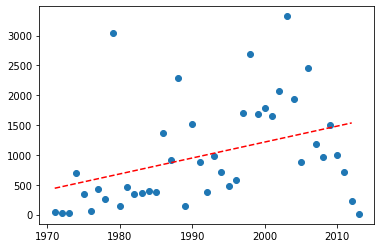

In [6]:
# fit a straight line to the economic data
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot
 
# define the true objective function
def objective(x, a, b):
	return a * x + b 
 
# load the dataset

data = df['Year'][df['Year']>1970].value_counts().sort_index()
# choose the input and output variables
x, y = data.index.values, data.values
# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b = popt
print('y = %.5f * x + %.5f' % (a, b))
# plot input vs output
pyplot.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

In [7]:
#next year :
Year_2014 = int(26.69571 * 2014 + -52175.94986)
print("there should be %.0f meteorites  in 2014"% (Year_2014)) 

there should be 1589 meteorites  in 2014


In [8]:
df2=df.copy()
df2['Coordinates']=df2['Coordinates'].astype(str)
count=0
for i in df2['Coordinates']:
    df2['Coordinates'][count] = ''.join(filter(lambda i: i.isdigit() or i=='.'or i==',' , df2['Coordinates'][count]))
    try:
        df2['Coordinates'][count]=df2['Coordinates'][count].split(',')
    except:
        #df2['Coordinates'][count]= -99 #-99 means value is unknown
        cpt=1
    count+=1
df2
    

C:\Users\tlejo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\tlejo\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Name,ID,NameType,Classification,Mass,Fall,Year,Coordinates
0,Aachen,1,Valid,L5,21,Fell,1880.0,"[50.775, 6.08333]"
1,Aarhus,2,Valid,H6,720,Fell,1951.0,"[56.18333, 10.23333]"
2,Abee,6,Valid,EH4,107000,Fell,1952.0,"[54.21667, 113.]"
3,Acapulco,10,Valid,Acapulcoite,1914,Fell,1976.0,"[16.88333, 99.9]"
4,Achiras,370,Valid,L6,780,Fell,1902.0,"[33.16667, 64.95]"
...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172,Found,1990.0,"[29.037, 17.0185]"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46,Found,1999.0,"[13.78333, 8.96667]"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,"[49.25, 17.66667]"
45714,Zubkovsky,31357,Valid,L6,2167,Found,2003.0,"[49.78917, 41.5046]"


In [9]:
df2['Longitude']=df2['Coordinates']
df2['Latitude']=df2['Coordinates']
for i in range(len(df2)):
    try:
        df2['Latitude'][i]=float(df2['Coordinates'][i][0])
        df2['Longitude'][i]=float(df2['Coordinates'][i][1])     
    except: 
        df2 = df2.drop(index=i)
df2

C:\Users\tlejo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\tlejo\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,ID,NameType,Classification,Mass,Fall,Year,Coordinates,Longitude,Latitude
0,Aachen,1,Valid,L5,21,Fell,1880.0,"[50.775, 6.08333]",6.08333,50.775
1,Aarhus,2,Valid,H6,720,Fell,1951.0,"[56.18333, 10.23333]",10.2333,56.1833
2,Abee,6,Valid,EH4,107000,Fell,1952.0,"[54.21667, 113.]",113,54.2167
3,Acapulco,10,Valid,Acapulcoite,1914,Fell,1976.0,"[16.88333, 99.9]",99.9,16.8833
4,Achiras,370,Valid,L6,780,Fell,1902.0,"[33.16667, 64.95]",64.95,33.1667
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172,Found,1990.0,"[29.037, 17.0185]",17.0185,29.037
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46,Found,1999.0,"[13.78333, 8.96667]",8.96667,13.7833
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,"[49.25, 17.66667]",17.6667,49.25
45714,Zubkovsky,31357,Valid,L6,2167,Found,2003.0,"[49.78917, 41.5046]",41.5046,49.7892


In [10]:
X=df2['Longitude'][(df2['Latitude']>=16.8) & (df2['Latitude']<=24.8) & (df2['Longitude']>=51.9) & (df2['Longitude']<=59.9) & ((df2['Latitude']-20.5)**2+(df2['Longitude']-52.5)**2>1)]
Y=df2['Latitude'][(df2['Latitude']>=16.8) & (df2['Latitude']<=24.8) & (df2['Longitude']>=51.9) & (df2['Longitude']<=59.9) & ((df2['Latitude']-20.5)**2+(df2['Longitude']-52.5)**2>1)]
x = X.astype(float)
y = Y.astype(float)

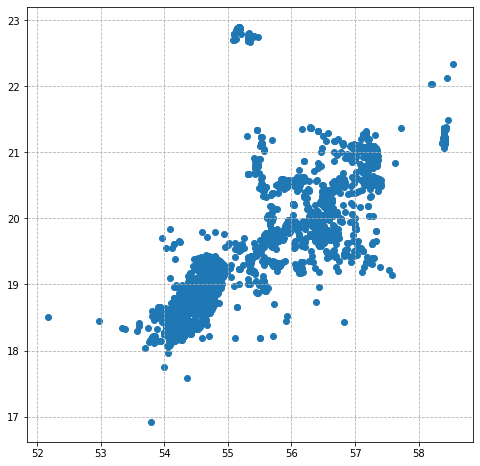

In [11]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
plt.scatter(X,Y)
plt.grid(linestyle='--')

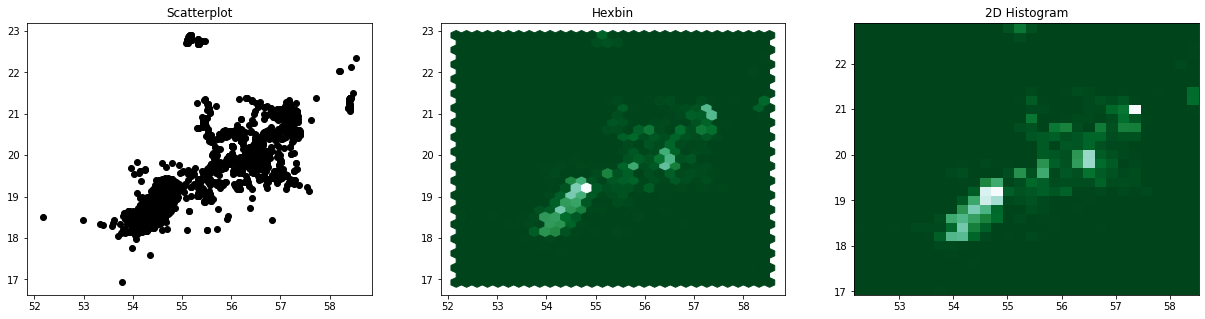

In [12]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde 
# Create a figure with 6 plot areas
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(21, 5))
 
# Everything starts with a Scatterplot
axes[0].set_title('Scatterplot')
axes[0].plot(x, y, 'ko')
# Thus we can cut the plotting window in several hexbins
nbins = 30
axes[1].set_title('Hexbin')
axes[1].hexbin(x, y, gridsize=nbins, cmap=plt.cm.BuGn_r)
 
# 2D Histogram
axes[2].set_title('2D Histogram')
axes[2].hist2d(x, y, bins=nbins, cmap=plt.cm.BuGn_r)
 
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
values = np.vstack([x, y])
k = kde.gaussian_kde(values)
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

C:\Users\tlejo\anaconda3\lib\site-packages\seaborn\distributions.py:693: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


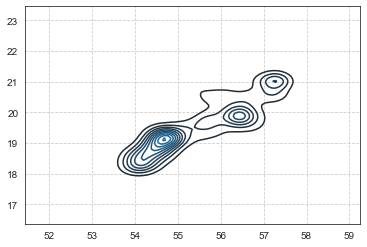

C:\Users\tlejo\anaconda3\lib\site-packages\seaborn\distributions.py:693: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)
C:\Users\tlejo\anaconda3\lib\site-packages\seaborn\distributions.py:437: UserWarning: The following kwargs were not used by contour: 'bw_adjust'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


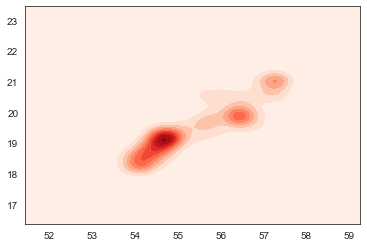

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
test=pd.DataFrame([X.astype(float), Y.astype(float)]).T
test
# set seaborn style
sns.set_style("white")
plt.grid(linestyle='--')


# Basic 2D density plot
sns.kdeplot(data=test)
plt.show()
plt.grid(linestyle='--')


# Custom the color, add shade and bandwidth
sns.kdeplot(data=test, cmap="Reds", shade=True, bw_adjust=.5)
plt.show()

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.datasets import make_blobs

# Define the borders
xmin = 51.9
xmax = 59.9
ymin = 16.8
ymax = 24.8

# Create meshgrid
xx, yy = np.mgrid[xmin:xmax:1000j, ymin:ymax:1000j]

In [15]:
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

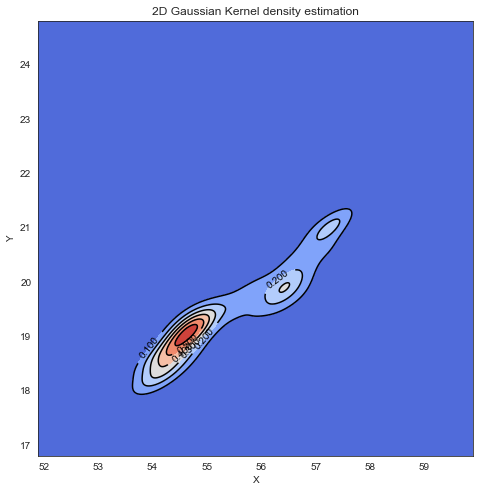

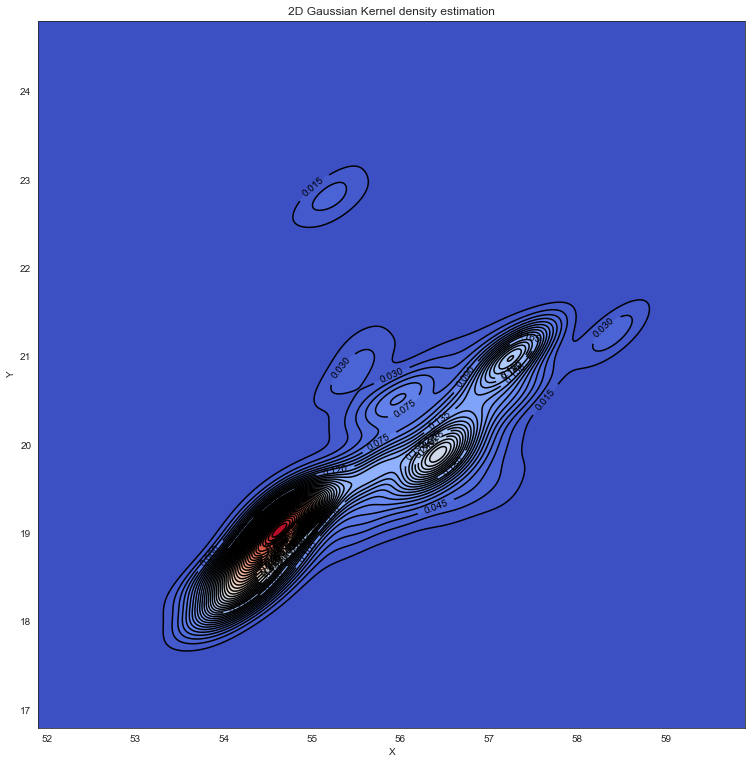

In [16]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
cfset = ax.contourf(xx, yy, f, cmap='coolwarm')
ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('2D Gaussian Kernel density estimation')


fig = plt.figure(figsize=(13,13))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
cfset = ax.contourf(xx, yy, f, cmap='coolwarm',levels=50)
ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])

cset = ax.contour(xx, yy, f, colors='k',levels=50)
ax.clabel(cset, inline=1, fontsize=10)

ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('2D Gaussian Kernel density estimation')
plt.show()

In [30]:
import math
#Oman se situe vers 20 degré de latitude. A 20 degré de latitude, 1degré de longitude est égale à environ (en km):
un_deg_long = (math.cos(20*math.pi/180))/360*400075
print(un_deg_long)
#donc 100km équivaut à ça en degré latitude et longitude
distance_deg= 100/104.6
distance_deg

1044.29868128034


0.9560229445506693

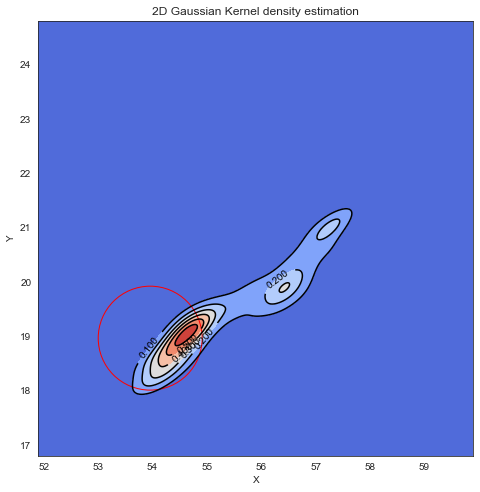

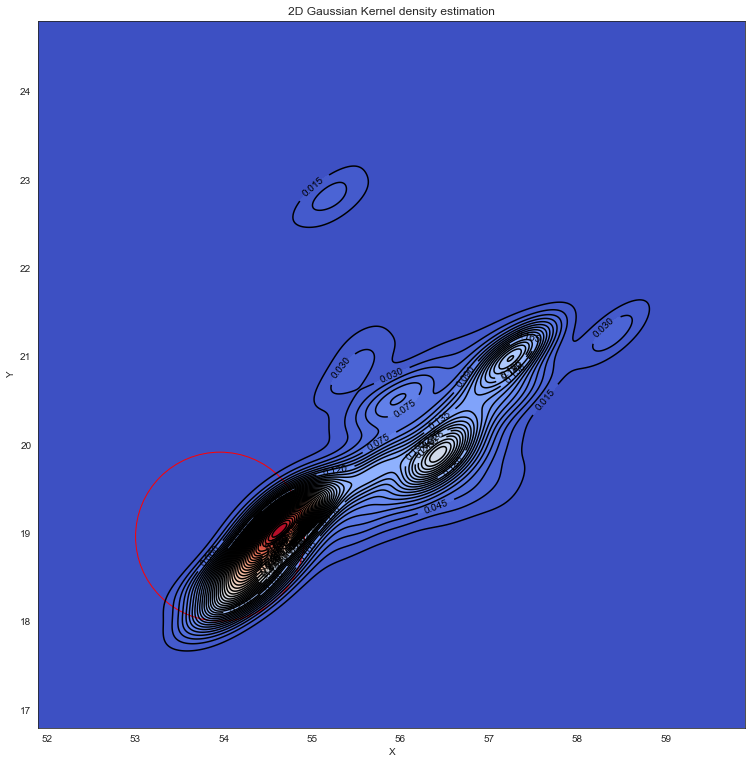

In [31]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
cfset = ax.contourf(xx, yy, f, cmap='coolwarm')
ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('2D Gaussian Kernel density estimation')
a_circle = plt.Circle((53.9555, 18.9644), distance_deg,fill=False, color='r')
ax.add_patch(a_circle)
plt.show()


fig = plt.figure(figsize=(13,13))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
cfset = ax.contourf(xx, yy, f, cmap='coolwarm',levels=50)
ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f, colors='k',levels=50)
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('2D Gaussian Kernel density estimation')
a_circle = plt.Circle((53.9555, 18.9644), distance_deg,fill=False, color='r')
ax.add_patch(a_circle)

In [32]:
#0.008 is the length of a pixel (0.008dx, 0.008dy)

pixel_x= (53.9555 - 51.9)/0.008  
pixel_y =(18.9644 - 16.8)/0.008
probabilite=0
for i in range(len(f)):
    for j in range((len(f))):
        if (i-pixel_x)*(i-pixel_x)+(j-pixel_y)*(j-pixel_y) <(distance_deg*120)*(distance_deg*120):
            probabilite+=f[i][j]*0.008*0.008

print(probabilite)

0.36689716516397003


In [34]:
#METHODE 2
Y2=df2['Latitude'][(df2['Latitude']>=16.8) & (df2['Latitude']<=24.8) & (df2['Longitude']>=51.9) & (df2['Longitude']<=59.9) & ((df2['Latitude']-18.9644)**2+(df2['Longitude']-53.9555)**2<distance_deg)]
Y=df2['Latitude'][(df2['Latitude']>=16.8) & (df2['Latitude']<=24.8) & (df2['Longitude']>=51.9) & (df2['Longitude']<=59.9) & ((df2['Latitude']-20.5)**2+(df2['Longitude']-52.5)**2>1)]
prob=len(Y2)/len(Y)
print(prob)

0.4782608695652174
